# Aula 1 - Análise sobre imóveis para locação

1. Importando dados 
2. _Series_ e _index_
3. Filtrando dados
4. Frequências
5. Tratando dados faltantes
6. Novas variáveis
7. Estatísticas descritivas
8. Removendo _outliers_

In [ ]:
import pandas as pd

## 1 Importando dados

### 1.1 Importando dados de arquivo CSV

In [ ]:
# importanto conteúdo de um arquivo CSV em que o "ponto e vírgula" eh o separador das colunas para um dataframe
df = pd.read_csv('dados/aula1_aluguel.csv', sep=';')

In [ ]:
# visao prévia do nosso dataframe
print(f"A base de dados apresenta {df.shape[0]} (imóveis) e {df.shape[1]} variáveis\n")
df.head()

A base de dados apresenta 32960 (imóveis) e 9 variáveis



,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [ ]:
# visualizando os tipos de dados das colunas e quantidade de valores nao nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [ ]:
# visualizando apenas os tipos de dados
df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [ ]:
tipos_dados = pd.DataFrame(df.dtypes, columns=['tipo de dado'])

In [ ]:
tipos_dados.columns.name = 'variavel'
tipos_dados

variavel,tipo de dado
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


### 1.2 Importando outros formatos de dados

In [ ]:
# carregando arquivo em formato JSON
df_json = pd.read_json('dados/aula1_aluguel.json')
df_json

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


In [ ]:
# carregando arquivo em formato txt com as colunas separadas por tabulação
df_txt = pd.read_table('dados/aula1_aluguel.txt') # o separador padrao dessa função eh a tabulacao
df_txt

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


In [ ]:
# carregando arquivo excel
df_excel = pd.read_excel('dados/aula1_aluguel.xlsx')
df_excel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000,19193.0,3030.0


Também temos a possibilidade de carregar dados diretamente de uma página HTML. No exemplo abaixo é feita a leitura dos dados a partir de uma página que possui três tabelas, portanto o retorno é uma lista em que cada item é um DataFrame com os dados de uma tabela.

In [ ]:
# df_html = pd.read_html('dados/aula1_dados_html.html')
df_html = pd.read_html('https://www.federalreserve.gov/releases/h3/current/default.htm')
len(df_html)

3

In [ ]:
df_html[0].head()

Date      Reserve balances required                              \
         Date Reserve balance requirements 1 Top of penalty- free band 2   
0     Month 7                        Month 7                     Month 7   
1   Aug. 2019                         134639                      148114   
2  Sept. 2019                         134707                      148188   
3   Oct. 2019                         134998                      148509   
4   Nov. 2019                         140705                      154787   

                                 Reserve balances maintained 4  \
  Bottom of penalty- free band 3                         Total   
0                        Month 7                       Month 7   
1                         121167                       1520876   
2                         121227                       1439771   
3                         121489                       1481513   
4                         126625                       1529341   

                                                                 \
  Balances maintained to satisfy reserve balance requirements 5   
0                                            Month 7              
1                                             147555              
2                                             147498              
3                                             148050              
4                                             154256              

                                                                       
  Balances maintained that exceed the top of the penalty- free band 6  
0                                            Month 7                   
1                                            1373321                   
2                                            1292273                   
3                                            1333462                   
4                                            1375085

## 2 _Series_ e _Index_

### 2.1 Tipos de imóveis - Removendo valores repetidos

Para identificar os tipos de imóveis que existem no DataFrame podemos começar criando um novo DataFrame apenas com a coluna que vamos analisar. Este novo DataFrame será uma _series_, que é um _array_ unidimensional. Então a partir disso podemos atuar de diferentes maneiras:

In [ ]:
df = pd.read_csv('dados/aula1_aluguel.csv', sep=';')

In [ ]:
# cria uma series com os tipos de imóveis que existem no df
tipos_imoveis = df['Tipo']
type(tipos_imoveis)

pandas.core.series.Series

In [ ]:
# aplicando o método unique(), que retorna um array numpy apenas com os valores únicos
tipos_imoveis.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
# podemos criar um set a partir dos elementos que existem na variável tipos_imoveis
set(tipos_imoveis)

{'Apartamento',
 'Box/Garagem',
 'Casa',
 'Casa Comercial',
 'Casa de Condomínio',
 'Casa de Vila',
 'Chácara',
 'Conjunto Comercial/Sala',
 'Flat',
 'Galpão/Depósito/Armazém',
 'Hotel',
 'Indústria',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Loja/Salão',
 'Loteamento/Condomínio',
 'Pousada/Chalé',
 'Prédio Inteiro',
 'Quitinete',
 'Studio',
 'Sítio',
 'Terreno Padrão'}

In [ ]:
# aplicando um método que remove todas as linhas duplicadas, mantendo apenas uma ocorrência
tipos_imoveis.drop_duplicates()

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [ ]:
tipos_imoveis.shape

(32960,)

Essas três abordagens não modificam o DataFrame original e usando dessa forma devemos atribuir o retorno a uma nova variável. Mas com a última opção ainda podemos modificar a variável original, na qual o método está sendo aplicado. Para isso basta passar o parâmetro `inplace=True`:

In [ ]:
tipos_imoveis.drop_duplicates(inplace=True)
tipos_imoveis.shape

(22,)

#### 2.1.1 Redefinindo o _index_

Se criarmos um DataFrame com a _series_ de valores únicos vamos ver que os índices não estão seguindo uma ordem, pois os que ficaram são referentes a primeira ocorrência de cada tipo de imóvel no DataFrame original.

Para "corrigir" isso podemos atribuir um `range()` com passo igual a 1 e o número de linhas do DataFrame como tamalho:

In [ ]:
tipos_imoveis = pd.DataFrame(tipos_imoveis)
tipos_imoveis

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [ ]:
tipos_imoveis.index = range(tipos_imoveis.shape[0])
tipos_imoveis.index

RangeIndex(start=0, stop=22, step=1)

In [ ]:
tipos_imoveis

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [ ]:
# uma alternativa é aplicar o método reset_index() passando um parametro para remover o indice original, que retorna um novo df e aceita o parametro inplace
pd.DataFrame(tipos_imoveis.drop_duplicates()).reset_index(drop=True)

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


### 2.2 Criando estruturas de dados

Para identificar os tipos de imóveis que existem no DataFrame podemos começar criando um novo DataFrame apenas com a coluna que vamos analisar. Este novo DataFrame será uma _series_, que é um _array_ unidimensional. Então a partir disso podemos atuar de diferentes maneiras:

#### 2.2.1 _Series_

Podemos criar _series_ a partir de diferentes contentores e realizar operações matemáticas com elas:

In [ ]:
# criando uma series a partir de uma lista
dados = [1, 2, 3, 4, 5]
s = pd.Series(dados)
s

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [ ]:
indices = [f"Linha {i}" for i in range(5)]
indices

['Linha 0', 'Linha 1', 'Linha 2', 'Linha 3', 'Linha 4']

In [ ]:
# definindo os indices de forma explicita
si = pd.Series(data=dados, index=indices)
si

Linha 0    1
Linha 1    2
Linha 2    3
Linha 3    4
Linha 4    5
dtype: int64

In [ ]:
dados = {f"Linha {i}": i+1 for i in range(5)}
dados

{'Linha 0': 1, 'Linha 1': 2, 'Linha 2': 3, 'Linha 3': 4, 'Linha 4': 5}

In [ ]:
# criando a series a partir de um dicionario, com indices definidos explicitamente
si = pd.Series(dados)
si

Linha 0    1
Linha 1    2
Linha 2    3
Linha 3    4
Linha 4    5
dtype: int64

In [ ]:
# somando um número à serie, ou seja, a cada um dos seus valores
s1 = si + 2
s1

Linha 0    3
Linha 1    4
Linha 2    5
Linha 3    6
Linha 4    7
dtype: int64

In [ ]:
# somando duas series
si + s1

Linha 0     4
Linha 1     6
Linha 2     8
Linha 3    10
Linha 4    12
dtype: int64

Nos caso acima, realizamos uma operação com duas _series_ que possuiam os mesmos índices. Mas para o caso em que os índices não coincidam, será colocado um valor nulo no resultado:

In [ ]:
s + si

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
Linha 0   NaN
Linha 1   NaN
Linha 2   NaN
Linha 3   NaN
Linha 4   NaN
dtype: float64

#### 2.2.2 _DataFrames_

Da mesma forma que fizemos com as _series_, podemos criar _DataFrames_ a partir de diferentes contentores e concatená-los:

In [ ]:
# lista de listas (ou ainda, uma matriz)
dados = [[(i+1)*(j+3) for j in range(3)] for i in range(3)]
dados

[[3, 4, 5], [6, 8, 10], [9, 12, 15]]

In [ ]:
# cria um df a partir de uma lista de listas, cada lista eh uma linha
df1 = pd.DataFrame(dados)
df1

,0,1,2
0,3,4,5
1,6,8,10
2,9,12,15


In [ ]:
indices = [f"Linha {i}" for i in range(3)]
indices

['Linha 0', 'Linha 1', 'Linha 2']

In [ ]:
colunas = [f"Coluna {i}" for i in range(3)]
colunas

['Coluna 0', 'Coluna 1', 'Coluna 2']

In [ ]:
# cria o df especificando valore dos indices e nome das colunas
df2 = pd.DataFrame(data=dados, index=indices, columns=colunas)
df2

,Coluna 0,Coluna 1,Coluna 2
Linha 0,3,4,5
Linha 1,6,8,10
Linha 2,9,12,15


In [ ]:
dados = {f"Coluna {i}": {f"Linha {j}": (j+1)*(i+3) for j in range(3)} for i in range(3)}
dados

{'Coluna 0': {'Linha 0': 3, 'Linha 1': 6, 'Linha 2': 9},
 'Coluna 1': {'Linha 0': 4, 'Linha 1': 8, 'Linha 2': 12},
 'Coluna 2': {'Linha 0': 5, 'Linha 1': 10, 'Linha 2': 15}}

In [ ]:
# criando df a partir de um dicionario, onde cada item eh uma coluna e seus valores sao dicionarios em que as chaves sao os indices de cada linha
df3 = pd.DataFrame(dados)
df3

,Coluna 0,Coluna 1,Coluna 2
Linha 0,3,4,5
Linha 1,6,8,10
Linha 2,9,12,15


In [ ]:
# modificando os indices, para nao repetir os mesmos valores em cada loop
df4 = pd.DataFrame({f"Coluna {i}": {f"Linha {j+i}": (j+1)*(i+3) for j in range(3)} for i in range(3)})
df4

,Coluna 0,Coluna 1,Coluna 2
Linha 0,3.0,NaN,NaN
Linha 1,6.0,4.0,NaN
Linha 2,9.0,8.0,5.0
Linha 3,NaN,12.0,10.0
Linha 4,NaN,NaN,15.0


In [ ]:
dados = [(3, 4, 5), 
         (6, 8, 10), 
         (9, 12, 15)]
dados

[(3, 4, 5), (6, 8, 10), (9, 12, 15)]

In [ ]:
# criando df a partir de uma lista de tuplas
df4 = pd.DataFrame(data=dados, index=indices, columns=colunas)
df4

,Coluna 0,Coluna 1,Coluna 2
Linha 0,3,4,5
Linha 1,6,8,10
Linha 2,9,12,15


##### 2.2.2.1 Concatenando _DataFrames_

No momento tenho três _DataFrames_ iguais, então vou alterar os três para que cada um tenha um único valor em todo df:

In [ ]:
df2[df2 > 0] = 'A'
df2

,Coluna 0,Coluna 1,Coluna 2
Linha 0,A,A,A
Linha 1,A,A,A
Linha 2,A,A,A


In [ ]:
df3[df3 > 0] = 'B'
df3

,Coluna 0,Coluna 1,Coluna 2
Linha 0,B,B,B
Linha 1,B,B,B
Linha 2,B,B,B


In [ ]:
df4[df4 > 0] = 'D'
df4

,Coluna 0,Coluna 1,Coluna 2
Linha 0,D,D,D
Linha 1,D,D,D
Linha 2,D,D,D


In [ ]:
# empilhando os tres dataframes usando o nome das colunas (axis=0, default) como as "variáveis de cola"
pd.concat([df2, df3, df4], axis=0)

,Coluna 0,Coluna 1,Coluna 2
Linha 0,A,A,A
Linha 1,A,A,A
Linha 2,A,A,A
Linha 0,B,B,B
Linha 1,B,B,B
Linha 2,B,B,B
Linha 0,D,D,D
Linha 1,D,D,D
Linha 2,D,D,D


In [ ]:
# empilhando os tres dataframes usando o indice das linhas (axis=1) como "variável cola"
pd.concat([df2, df3, df4], axis=1)

,Coluna 0,Coluna 1,Coluna 2,Coluna 0,Coluna 1,Coluna 2,Coluna 0,Coluna 1,Coluna 2
Linha 0,A,A,A,B,B,B,D,D,D
Linha 1,A,A,A,B,B,B,D,D,D
Linha 2,A,A,A,B,B,B,D,D,D


## 3 Filtrando dados

### 3.1 Imóveis residênciais

Vamos filtrar apenas os tipos de imóveis que podem ser classificados como residênciais. Primeiro criamos uma _series_ com os tipos únicos de imóveis e então prosseguimos para uma seleção manual. Após isso filtramos apenas os imóveis residênciais em nosso _DataFrame_.

In [ ]:
# carrega arquivo para df
df = pd.read_csv('dados/aula1_aluguel.csv', sep=';')
df.columns = df.columns.str.lower()

In [ ]:
# tipos de imoveis do df
tipos_imoveis = df.tipo
tipos_imoveis.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [ ]:
# apenas imoveis do tipo residencial
tipos_residenciais = ['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']
tipos_residenciais

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

Existem diferentes formas de realizar a seleção das linhas que queremos manter no df. A primeira, aqui abordada, é usando o método `isin()` na coluna com a informação avaliada. Teremos como retorno uma _series_ de _booleanos_ indicando se o valor existe ou não na lista passada (`tipos_residenciais`). E então podemos usar essa _series_ para fazer a seleção das linhas que queremos.

In [ ]:
# cria series booleana aplicando o metodo isin() na coluna 'tipo'
imoveis_selecionados = df.tipo.isin(tipos_residenciais)
imoveis_selecionados

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: tipo, Length: 32960, dtype: bool

In [ ]:
# seleciona imoveis residênciais usando series booleana
imoveis_residenciais = df[imoveis_selecionados]
imoveis_residenciais

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
print(f"{imoveis_residenciais.shape[0]} imóveis residênciais\n")
imoveis_residenciais.tipo.unique()

22580 imóveis residênciais



array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio',
       'Casa de Vila'], dtype=object)

Outra forma de filtrar linhas em um _DataFrame_ é com o método `query()`, que é aplicado no df e recebe um condição. Todas as linhas que satisfizerem a condição serão retornadas em um novo df.

In [ ]:
# filtrando com metodo query()
novo_imoveis_residenciais = df.query(f"tipo in {tipos_residenciais}")
novo_imoveis_residenciais

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
print(f"{novo_imoveis_residenciais.shape[0]} imóveis residênciais\n")
novo_imoveis_residenciais.tipo.unique()

22580 imóveis residênciais



array(['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio',
       'Casa de Vila'], dtype=object)

Agora podemos também resetar o índice no df filtrado:

In [ ]:
imoveis_residenciais.index = range(imoveis_residenciais.shape[0])
imoveis_residenciais

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


### 3.2 Exportando dados para CSV

In [ ]:
# exporta dados de df para arquivo CSV
imoveis_residenciais.to_csv('dados/aula1_aluguel_residencial.csv', sep=';')

In [ ]:
new_imoveis_residenciais = pd.read_csv('dados/aula1_aluguel_residencial.csv', sep=';')
new_imoveis_residenciais.head()

,Unnamed: 0,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


Nos deparamos com um problema que é que agora temos uma coluna com os índices do df. Isso ocorre porque não informamos que os índices não deveriam ser enviados para o arquivo, mas para "corrigir" isso basta informar: 

In [ ]:
# exporta dados de df para arquivo CSV, informando que não quer enviar indices
imoveis_residenciais.to_csv('dados/aula1_aluguel_residencial.csv', sep=';', index=False)

In [ ]:
imoveis_residenciais = pd.read_csv('dados/aula1_aluguel_residencial.csv', sep=';')
imoveis_residenciais.head()

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


### 3.3 Organizando _DataFrames_

Podemos ordenar as linhas e as colunas de um df usando alguns métodos do Pandas. Vamos ver como funcionam os métodos `sert_index()` e `sort_values()`.

In [ ]:
dados = [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]
dados

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [ ]:
list('321')

['3', '2', '1']

In [ ]:
# cria df com indices e colunas não ordenadas
df = pd.DataFrame(data=dados, index=list('321'), columns=list('zyx'))
df

,z,y,x
3,1,2,3
2,4,5,6
1,7,8,9


In [ ]:
# ordena as linhas do df de acordo com o valor dos indices (axis=0)
df.sort_index(inplace=True)
df

,z,y,x
1,7,8,9
2,4,5,6
3,1,2,3


In [ ]:
# ordena as colunas do df de acordo com seus nomes
df.sort_index(axis=1, inplace=True)
df

,x,y,z
1,9,8,7
2,6,5,4
3,3,2,1


In [ ]:
# ordena as linhas do df de acordo com os valores da coluna 'x'
df.sort_values(by='x', inplace=True)
df

,x,y,z
3,3,2,1
2,6,5,4
1,9,8,7


In [ ]:
# ordena as colunas do df de acordo com os valores da linha com índice '3'
df.sort_values(by='3', axis=1, inplace=True)
df

,z,y,x
3,1,2,3
2,4,5,6
1,7,8,9


In [ ]:
# ordena as linhas do df de acordo com os valores das colunas 'x' e 'y
df.sort_values(by=['x', 'y'], inplace=True)
df

,z,y,x
3,1,2,3
2,4,5,6
1,7,8,9


## 4 Frequências

### 4.1 Mais seleções de dados

Vamos trabalhar um pouco mais a seleção de dados, e agora contando a quantidade de imóveis em algumas condições:

1. selecionando apenas imóveis do tipo 'Apartamento'
2. selecionando apenas imóveis dos tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila'
3. selecionando imóveis que com área entre 60 e 100 metros quadrados, incluindo os limitites
4. selecionando imóveis que tenham pelo menos 4 quartos e aluguel menor que R$ 2.000,00

In [ ]:
# carrega arquivo para df
df = pd.read_csv('dados/aula1_aluguel_residencial.csv', sep=';')
df.columns = df.columns.str.lower()

In [ ]:
# contando a quantidade de imóveis para cada tipo
df.tipo.value_counts()

Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Casa de Vila            249
Name: tipo, dtype: int64

In [ ]:
# 1) contando a quantidade de imóveis classificados com tipo 'Apartamento'
df.query("tipo == 'Apartamento'").shape[0]

19532

In [ ]:
# 2a) contando a quantidade de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' (selecionando pelos indices)
selecao = (df.tipo == 'Casa') | (df.tipo == 'Casa de Condomínio') | (df.tipo == 'Casa de Vila')
df[selecao].shape[0]

2212

In [ ]:
# 2b) contando a quantidade de imóveis classificados com tipos 'Casa', 'Casa de Condomínio' e 'Casa de Vila' (selecionando com metodo query())
df.query("tipo in ['Casa', 'Casa de Condomínio', 'Casa de Vila']").shape[0]

2212

In [ ]:
# 3) contando imóveis com área entre 60 e 100 metros quadrados
selecao = (df.area >= 60) & (df.area <= 100)
df[selecao].shape[0]

8719

In [ ]:
df.query("area >= 60 and area <= 100").shape[0]

8719

In [ ]:
# contando quantidade de imóveis com de acordo com número de quartos 
df.quartos.value_counts()

2     8205
3     6811
1     3609
4     3049
5      561
0      165
6      128
7       28
8       10
10       8
14       2
12       1
9        1
32       1
11       1
Name: quartos, dtype: int64

In [ ]:
# 4) contando imóveis com pelo menos 4 quartos e aluguel menor que R$ 2.000,00
selecao = (df.quartos >= 4) & (df.valor < 2000)
df[selecao].shape[0]

41

In [ ]:
df.query("quartos >= 4 and valor < 2000").shape[0]

41

### 4.2 Outras formas de seleção

In [ ]:
# cria df genérico
dados = [(1, 2, 3, 4),
         (5, 6, 7, 8),
         (9, 10, 11, 12),
         (13, 14, 15, 16)]
df = pd.DataFrame(data=dados, index='l1 l2 l3 l4'.split(), columns='c1 c2 c3 c4'.split())
df

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


In [ ]:
# selecionando uma coluna
df['c1']

l1     1
l2     5
l3     9
l4    13
Name: c1, dtype: int64

In [ ]:
# quando selecionamos uma única coluna temos uma series
type(df['c1'])

pandas.core.series.Series

In [ ]:
# selecionando mais de uma coluna
df[['c3', 'c1']]

,c3,c1
l1,3,1
l2,7,5
l3,11,9
l4,15,13


In [ ]:
# ao selecionar mais de uma coluna temos um df
type(df[['c3', 'c1']])

pandas.core.frame.DataFrame

In [ ]:
# podemos fazer recortes nos índices númericos
df[:]

,c1,c2,c3,c4
l1,1,2,3,4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


In [ ]:
df[1:]

,c1,c2,c3,c4
l2,5,6,7,8
l3,9,10,11,12
l4,13,14,15,16


In [ ]:
df[1:3]

,c1,c2,c3,c4
l2,5,6,7,8
l3,9,10,11,12


In [ ]:
# podemos combinar essas duas formas de seleção
df[1:][['c3', 'c1']]

,c3,c1
l2,7,5
l3,11,9
l4,15,13


#### 4.2.1 Seleção com `loc` e `iloc`

Esses dois recursos permitem fazer seleções com os rótulos de um _DataFrame_ em ambos eixos e diferem apenas pelo tipo de rótulo.

```
df.loc[linhas, colunas]
df.iloc[linhas, colunas]
```

O `loc` trabalhando com os rótulos nominais, enquanto que o `iloc` com os rótulos numéricos.

In [ ]:
# criando uma series com a linha 3 (loc)
df.loc['l3']

c1     9
c2    10
c3    11
c4    12
Name: l3, dtype: int64

In [ ]:
# criando uma series com a linha 3 (iloc)
df.iloc[2]

c1     9
c2    10
c3    11
c4    12
Name: l3, dtype: int64

In [ ]:
# criando um df com as linhas 3 e 2
df.loc[['l3', 'l2']]

,c1,c2,c3,c4
l3,9,10,11,12
l2,5,6,7,8


In [ ]:
df.iloc[[2, 1]]

,c1,c2,c3,c4
l3,9,10,11,12
l2,5,6,7,8


In [ ]:
# podemos selecionar um único valor passando o rótulo da linha e da coluna, similar a uma notação matricial
df.loc['l3', 'c2']

10

In [ ]:
df.iloc[2, 1]

10

In [ ]:
# criando um sub-df a partir do df inicial
df.loc[['l3', 'l1'], ['c4', 'c1']]

,c4,c1
l3,12,9
l1,4,1


In [ ]:
df.iloc[[2, 0], [3, 0]]

,c4,c1
l3,12,9
l1,4,1


## 5 Tratando dados faltantes

In [ ]:
# carrega arquivo para df
df = pd.read_csv('dados/aula1_aluguel_residencial.csv', sep=';')
df.columns = df.columns.str.lower()
df

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


### 5.1 Tirando valores nulos

Existem algumas formas de verificar se existem valores nulos em um _DataFrame_. Uma bem simples é utilizando o método `info()`, que nos retorna a quantidade de linhas que há em um df e quantos valores não nulos tem em cada coluna. Dessa forma podemos ter uma noção sobre os dados faltantes em nosso df.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22580 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tipo        22580 non-null  object 
 1   bairro      22580 non-null  object 
 2   quartos     22580 non-null  int64  
 3   vagas       22580 non-null  int64  
 4   suites      22580 non-null  int64  
 5   area        22580 non-null  int64  
 6   valor       22571 non-null  float64
 7   condominio  20765 non-null  float64
 8   iptu        15795 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


Também temos dois métodos dedicados a avaliar isso: `isnull()` e `notnull()`, cada um retornando um _booleano_ condizente com sua nomenclatura:

In [ ]:
# retorna um df com True sempre que o valor for nulo e False em caso contrário
df.isnull()

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [ ]:
# retorna um df com True sempre que o valor for não-nulo e False em caso contrário
df.notnull()

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
22575,True,True,True,True,True,True,True,True,True
22576,True,True,True,True,True,True,True,True,True
22577,True,True,True,True,True,True,True,True,True
22578,True,True,True,True,True,True,True,True,True


Se voltarmos à saída do método `info()` vemos que nem todas as colunas possuem valores nulos, então vamos nos concentrar apenas nas que possuem dados faltantes.

Vamos gerar um df apenas com as linhas que não possuem valor e depois removê-las do df que estamos analisando.

In [ ]:
# seleciona linhas que não possuem valor na coluna 'valor'
df[df.valor.isnull()]

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [ ]:
# remove linhas que possuem a valor nulo na coluna 'valor'
df.dropna(subset=['valor'])

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
print(f"Linhas no df antes de remover 'valor' nulo: {df.shape[0]}")
df.dropna(subset=['valor'], inplace=True)
print(f"Linhas no df APÓS de remover 'valor' nulo: {df.shape[0]}")

Linhas no df antes de remover 'valor' nulo: 22580
Linhas no df APÓS de remover 'valor' nulo: 22571


In [ ]:
# procurando novamente por valores nulos na coluna 'valor'
df[df.valor.isnull()]

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu


### 5.2 Tratamento condicional

Na etapa anterior removemos as linhas que não tinham valor na coluna 'valor', usando o método dropna(). Um dos argumentos que passamos foi `subset=['valor']`, pois queriamos que apenas a coluna 'valor' fosse avaliada. Se não tivessemos informado isso, o método `dropna()` teria eliminado todas as linhas que tivessem um valor faltando, independente da coluna.

Teria sido um erro eliminar todas as linhas com valores faltantes, pois existem casos em que isso não necessáriamente é algo ruim. No caso do campo 'valor', sua inexistência inviabiliza o uso do registro pois tudo vai girar em torno dessa informação. Mas para o campo 'condominio', por exemplo, sua existência é imprescindível apenas imóveis do tipo 'Apartamento'.

Então agora vamos remover do _DataFrame_ as linhas que possuem 'condominio' nulo, mas apenas as que são de imóveis do tipo 'Apartamento'.

In [ ]:
# núemro de imóveis com valor nulo na coluna 'condominio'
df.condominio.isnull().sum()

1813

In [ ]:
# distribuição de tipos de imóveis com condomínio nulo
df[df.condominio.isnull()].tipo.value_counts()

Casa                  755
Apartamento           745
Casa de Vila          154
Casa de Condomínio     95
Quitinete              64
Name: tipo, dtype: int64

In [ ]:
# seleciona linhas que devem ser removidas
selecao = (df.tipo == 'Apartamento') & df.condominio.isnull()
df[selecao]

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
83,Apartamento,Praça Seca,2,0,0,80,1000.0,NaN,NaN
117,Apartamento,Rocha Miranda,2,1,0,50,1100.0,NaN,NaN
133,Apartamento,Barra da Tijuca,1,1,1,65,2350.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22328,Apartamento,Copacabana,3,0,0,130,4600.0,NaN,NaN
22356,Apartamento,Guadalupe,1,0,0,40,550.0,NaN,NaN
22373,Apartamento,Bonsucesso,1,0,0,60,1000.0,NaN,NaN
22403,Apartamento,Flamengo,2,0,0,59,3500.0,NaN,NaN


In [ ]:
# df com linhas removidas
df[~selecao]

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [ ]:
print(f"Linhas no df antes de remover imóveis do tipo 'Apartamento' com 'condominio' nulo: {df.shape[0]}")
df = df[~selecao]
print(f"Linhas no df APÓS de remover imóveis do tipo 'Apartamento' com 'condominio' nulo: {df.shape[0]}")

Linhas no df antes de remover imóveis do tipo 'Apartamento' com 'condominio' nulo: 22571
Linhas no df APÓS de remover imóveis do tipo 'Apartamento' com 'condominio' nulo: 21826


In [ ]:
# distribuição de tipos de imóveis com condomínio nulo
df[df.condominio.isnull()].tipo.value_counts()

Casa                  755
Casa de Vila          154
Casa de Condomínio     95
Quitinete              64
Name: tipo, dtype: int64

### 5.3 Preenchendo valores faltantes com `fillna()`

Vamos utilizar o método `fillna()` para prencher os valores nulos que ainda temos em nosso _DataFrame_.

Para fins de facilitar a visualização, vamos selecionar as linhas que possuem valores nulos nas duas colunas: 'condominio' e 'iptu'.

In [ ]:
# preenchendo todos os valores faltantes com o mesmo valor (zero)
df[df.condominio.isnull() & df.iptu.isnull()].fillna(0)

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0
14,Casa de Condomínio,Taquara,3,1,1,115,2000.0,0.0,0.0
24,Casa,Campo Grande,4,1,2,400,12000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
22469,Casa de Vila,Riachuelo,3,0,0,73,850.0,0.0,0.0
22510,Casa,Campo Grande,1,0,0,50,600.0,0.0,0.0
22516,Casa de Vila,Pavuna,2,0,0,55,600.0,0.0,0.0
22535,Casa,Recreio dos Bandeirantes,4,2,2,352,6500.0,0.0,0.0


In [ ]:
# preenchendo os valores faltantes de cada coluna com um valor específico
df[df.condominio.isnull() & df.iptu.isnull()].fillna({'condominio': 123, 'iptu': 987})

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
1,Casa,Jardim Botânico,2,0,1,100,7000.0,123.0,987.0
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,123.0,987.0
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,123.0,987.0
14,Casa de Condomínio,Taquara,3,1,1,115,2000.0,123.0,987.0
24,Casa,Campo Grande,4,1,2,400,12000.0,123.0,987.0
...,...,...,...,...,...,...,...,...,...
22469,Casa de Vila,Riachuelo,3,0,0,73,850.0,123.0,987.0
22510,Casa,Campo Grande,1,0,0,50,600.0,123.0,987.0
22516,Casa de Vila,Pavuna,2,0,0,55,600.0,123.0,987.0
22535,Casa,Recreio dos Bandeirantes,4,2,2,352,6500.0,123.0,987.0


In [ ]:
# realizando a ação inplace
df.fillna(value=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
# quantidade de valores nulos
df.isnull().sum()

tipo          0
bairro        0
quartos       0
vagas         0
suites        0
area          0
valor         0
condominio    0
iptu          0
dtype: int64

In [ ]:
# exporta para arquivo novo conjunto de dados
df.to_csv('dados/aula1_aluguel_residencial.csv', sep=';', index=False)

### 5.4 Métodos de interpolação

In [ ]:
s = pd.Series([0.5, None, None, 0.52, 0.54, None, None, 0.59, 0.6, None, 0.7])
s

0     0.50
1      NaN
2      NaN
3     0.52
4     0.54
5      NaN
6      NaN
7     0.59
8     0.60
9      NaN
10    0.70
dtype: float64

In [ ]:
# funcionamento "padrão", interpolando valores nulos com zero
s.fillna(0)

0     0.50
1     0.00
2     0.00
3     0.52
4     0.54
5     0.00
6     0.00
7     0.59
8     0.60
9     0.00
10    0.70
dtype: float64

In [ ]:
# interpola valores nulos com o anterior mais próximo não nulo, de cima para baixo
s.fillna(method='ffill')

0     0.50
1     0.50
2     0.50
3     0.52
4     0.54
5     0.54
6     0.54
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [ ]:
# mesmo funcionamento que o método anterior, mas de baixo para cima
s.fillna(method='bfill')

0     0.50
1     0.52
2     0.52
3     0.52
4     0.54
5     0.59
6     0.59
7     0.59
8     0.60
9     0.70
10    0.70
dtype: float64

In [ ]:
# preenche com a média aritmética dos valores não nulos
s.fillna(s.mean())

0     0.500
1     0.575
2     0.575
3     0.520
4     0.540
5     0.575
6     0.575
7     0.590
8     0.600
9     0.575
10    0.700
dtype: float64

In [ ]:
# preenche com o anterior mais próximo não nulo, de cima para baixo, mas apenas UMA vez
s.fillna(method='ffill', limit=1)

0     0.50
1     0.50
2      NaN
3     0.52
4     0.54
5     0.54
6      NaN
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

In [ ]:
# dois metodos combinados, cada um UMA vez
s.fillna(method='ffill', limit=1).fillna(method='bfill', limit=1)

0     0.50
1     0.50
2     0.52
3     0.52
4     0.54
5     0.54
6     0.59
7     0.59
8     0.60
9     0.60
10    0.70
dtype: float64

## 6 Novas variáveis

In [ ]:
# carrega arquivo para df
df = pd.read_csv('dados/aula1_aluguel_residencial.csv', sep=';')
df.columns = df.columns.str.lower()

In [ ]:
df

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


### 6.1 Criando novas variáveis

Vamos criar algumas variáveis novas em nosso _DataFrame_, algumas numéricas e outra categórica. Nas novas variáveis numéricas teremos uma para representar o valor bruto do custo de aluguel (soma de outras váriaveis do df) e o valor por metro quadrado (razão entre variáveis). E a categórica irá indicar se um imóvel é casa ou apartamento.

In [ ]:
df.head(1)

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0


In [ ]:
# para as novas variáveis numéricas basta fazer o calculo usando as series das colunas envolvidas
df['valor_bruto'] = df.valor + df.condominio + df.iptu
df['valor_m2'] = round(df.valor/df.area, 2)
df['valor_m2_bruto'] = round(df.valor_bruto/df.area, 2)

In [ ]:
# para a nova variável categórica vamos usar o método apply() passando uma função lambda
casas = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
df['tipo_agregado'] = df.tipo.apply(lambda x: 'Casa' if x in casas else 'Apartamento')

In [ ]:
df.head(1)

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor_bruto,valor_m2,valor_m2_bruto,tipo_agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.5,56.5,Apartamento


### 6.2 Excluindo variáveis

Pensando na etapa em que tratamos os dados faltantes, podemos lembrar que vários imóveis não tinham o valor do IPTU declarado, o que nos levou a interpolar o valor zero nessa coluna para as linhas que estavam vazias. Como essa as novas variáveis que foram criadas usando a coluna 'iptu' podem não representar a realidade, vamos retirá-las do nosso conjunto de dados.

Temos algumas formas para fazer isso:

In [ ]:
# utilizo um df auxiliar para fins de teste
df_aux = df[['valor_bruto', 'valor_m2', 'valor_m2_bruto', 'tipo_agregado']]
df_aux.head(0)

,valor_bruto,valor_m2,valor_m2_bruto,tipo_agregado


In [ ]:
# remove coluna do df usando del, sem retorno
del df_aux['valor_bruto']
df_aux.head(0)

,valor_m2,valor_m2_bruto,tipo_agregado


In [ ]:
# metodo pop() recebe o nome da coluna a ser removida e realiza ação inplace, retorna a series removida
df_aux.pop('valor_m2_bruto')

0        56.50
1        70.00
2        80.67
3        21.46
4        32.36
         ...  
21821    20.54
21822    43.52
21823    33.85
21824    40.54
21825    53.71
Name: valor_m2_bruto, Length: 21826, dtype: float64

In [ ]:
df_aux.head(0)

,valor_m2,tipo_agregado


In [ ]:
# utiliza metodo drop()
df.drop(labels=['valor_bruto', 'valor_m2_bruto'], axis=1, inplace=True)
df.head(0)

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor_m2,tipo_agregado


In [ ]:
# exporta conjunto de dados para arquivo CSV
df.to_csv('dados/aula1_aluguel_residencial.csv', sep=';', index=False)

## 7 Estatísticas descritivas

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(20, 8))

# carrega arquivo para df
df = pd.read_csv('dados/aula1_aluguel_residencial.csv', sep=';')
df.columns = df.columns.str.lower()

### 7.1 Criando agrupamentos com `groupby()`

In [ ]:
# calcula media de valor para todo df
df.valor.mean()

5046.172821405663

Agora vamos determinar a média de valor por bairro, e para isso vamos usar o método `groupby()`. Este método quando aplicado em um _DataFrame_ retorna um novo df do tipo agrupado, no caso esse agrupamento deve ser em torno de algum campo do df original.

Vamos limitar nosso df de imóveis para os cinco bairros que mais aparecem e então gerar um df do tipo _groupby_:

In [ ]:
# frequencia de cada bairro no df
df.bairro.value_counts()

Barra da Tijuca             3863
Copacabana                  2644
Ipanema                     1764
Recreio dos Bandeirantes    1649
Leblon                      1258
                            ... 
Caju                           1
Senador Camará                 1
Rio da Prata                   1
Cidade Jardim                  1
Coelho Neto                    1
Name: bairro, Length: 152, dtype: int64

In [ ]:
# cinco bairros mais frequentes
df.bairro.value_counts()[:5]

Barra da Tijuca             3863
Copacabana                  2644
Ipanema                     1764
Recreio dos Bandeirantes    1649
Leblon                      1258
Name: bairro, dtype: int64

In [ ]:
# nome dos cinco bairros mais frequentes
df.bairro.value_counts()[:5].index

Index(['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Recreio dos Bandeirantes',
       'Leblon'],
      dtype='object')

In [ ]:
bairros = df.bairro.value_counts()[:5].index.tolist()
df_bairros_5mais = df.query(f"bairro in {bairros}")
df_bairros_5mais.bairro.unique()

array(['Copacabana', 'Barra da Tijuca', 'Ipanema',
       'Recreio dos Bandeirantes', 'Leblon'], dtype=object)

In [ ]:
# agrupa df em funçao do bairro
df_agrupado_bairro = df_bairros_5mais.groupby(by='bairro')
type(df_agrupado_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [ ]:
# atributo groups do novo df eh um dicionario
type(df_agrupado_bairro.groups)

pandas.io.formats.printing.PrettyDict

In [ ]:
len(df_agrupado_bairro.groups)

5

In [ ]:
# chaves do dicionario são os valores da variavel agrupada
df_agrupado_bairro.groups.keys()

dict_keys(['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Recreio dos Bandeirantes'])

In [ ]:
# os valores de cada item do dicionario são os indices numericos das series que contem esse valor no df original
df_agrupado_bairro.groups['Copacabana']

Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
               91,
            ...
            21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
            21815],
           dtype='int64', length=2644)

In [ ]:
# iterando os elementos do df agrupado
for i in df_agrupado_bairro:
    print(i)

('Barra da Tijuca',                      tipo           bairro  quartos  vagas  suites  area  \
5      Casa de Condomínio  Barra da Tijuca        5      4       5   750   
14            Apartamento  Barra da Tijuca        2      1       1    67   
16     Casa de Condomínio  Barra da Tijuca        4      3       2   466   
21            Apartamento  Barra da Tijuca        3      3       1   175   
30            Apartamento  Barra da Tijuca        3      1       2    70   
...                   ...              ...      ...    ...     ...   ...   
21801  Casa de Condomínio  Barra da Tijuca        3      5       3  1000   
21811         Apartamento  Barra da Tijuca        2      1       1    85   
21812         Apartamento  Barra da Tijuca        3      2       0    98   
21813         Apartamento  Barra da Tijuca        3      2       2   140   
21820  Casa de Condomínio  Barra da Tijuca        5      3       4   450   

         valor  condominio    iptu  valor_m2 tipo_agregado  
5     

In [ ]:
for bairro, dados in df_agrupado_bairro:
    print(f"{bairro}: {type(dados)}")

Barra da Tijuca: <class 'pandas.core.frame.DataFrame'>
Copacabana: <class 'pandas.core.frame.DataFrame'>
Ipanema: <class 'pandas.core.frame.DataFrame'>
Leblon: <class 'pandas.core.frame.DataFrame'>
Recreio dos Bandeirantes: <class 'pandas.core.frame.DataFrame'>


O que vemos aqui é que o _DataFrame_ do tipo _groupby_ é um conjunto de _DataFrames_ em que cada df contem apenas as _series_ com um valor da variável agrupada. Sabendo disso, podemos calcular a média de valor de cada um dos bairros:

In [ ]:
for bairro, dados in df_agrupado_bairro:
    print(f"{bairro}: {dados.valor.mean()}")

Barra da Tijuca: 7069.552938130986
Copacabana: 4126.677004538578
Ipanema: 9352.001133786847
Leblon: 8746.344992050874
Recreio dos Bandeirantes: 3736.6130988477867


Mas podemos encontrar essa informação de forma muito mais simples, calculando a média diretamente no df agrupado:

In [ ]:
df_agrupado_bairro.valor.mean()

bairro
Barra da Tijuca             7069.552938
Copacabana                  4126.677005
Ipanema                     9352.001134
Leblon                      8746.344992
Recreio dos Bandeirantes    3736.613099
Name: valor, dtype: float64

In [ ]:
# podemos selecionar mais de uma coluna tambem
df_agrupado_bairro[['valor', 'condominio']].mean().round(2)

,valor,condominio
bairro,,
Barra da Tijuca,7069.55,3591.01
Copacabana,4126.68,1148.68
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Recreio dos Bandeirantes,3736.61,924.86


### 7.2 Estatísticas descritivas

In [ ]:
# método describe() fornece o valor de algumas grandezas estatisticas (por bairro, ja que o grupamento foi feito em função dessa variável)
df_agrupado_bairro.valor.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Recreio dos Bandeirantes,1649.0,3736.61,30797.79,900.0,1800.0,2300.0,3200.0,1250000.0


Algo interessante que podemos notar por meio dessas grandezas é o valor máximo em alguns bairros, por exemplo, Barra da Tijuca e Recreio dos Bandeirantes estão apresentando valores máximos de aluguel de R\$ 600.000,00 e R\$ 1.250.000,00. Isso claramente deve ser um erro, como um valor de venda sendo cadastrado como aluguel, por exemplo.

Além do método `describe()` também podemos usar o método `aggregate()` para calcular o valor de grandezas estatísticas, inclusive escolhendo [quais grandezas queremos](https://pandas.pydata.org/docs/reference/groupby.html#computations-descriptive-stats).

In [ ]:
df_agrupado_bairro.valor.aggregate(['min', 'max', 'sum'])

,min,max,sum
bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Copacabana,100.0,35000.0,10910934.0
Ipanema,1200.0,90000.0,16496930.0
Leblon,100.0,100000.0,11002902.0
Recreio dos Bandeirantes,900.0,1250000.0,6161675.0


In [ ]:
# selecionando as grandezas que queremos e renomeando suas colunas
df_agrupado_bairro.valor.aggregate(func=['min', 'max']).rename(columns={'min': 'Valor mínimo', 'max': 'Valor máximo'}).round(2)

,Valor mínimo,Valor máximo
bairro,,
Barra da Tijuca,800.0,600000.0
Copacabana,100.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Recreio dos Bandeirantes,900.0,1250000.0


#### 7.2.1 Visualizando grandezas estatísticas com `matplotlib`

A pouco estavamos analisando apenas os cinco bairros com mais ocorrências em nosso df, porém, se voltarmops nossa atenção para todos os bairros pode ficar um pouco "complicado" de retirar _insights_ da visualização de uma tabela tão grande. Portanto, agora vamos plotar um gráfico para visualizar as grandezas que estamos calculando.

In [ ]:
# gera um df agrupado por bairro, considerando todos os bairros
df_agrupado_bairro_all = df.groupby(by='bairro')

Vamos calcular o valor de grandeza estatística para uma veriável do nosso df e plotar um gráfico de barras. Onde cada barra será um bairro e a altura o valor da grandeza calculada.

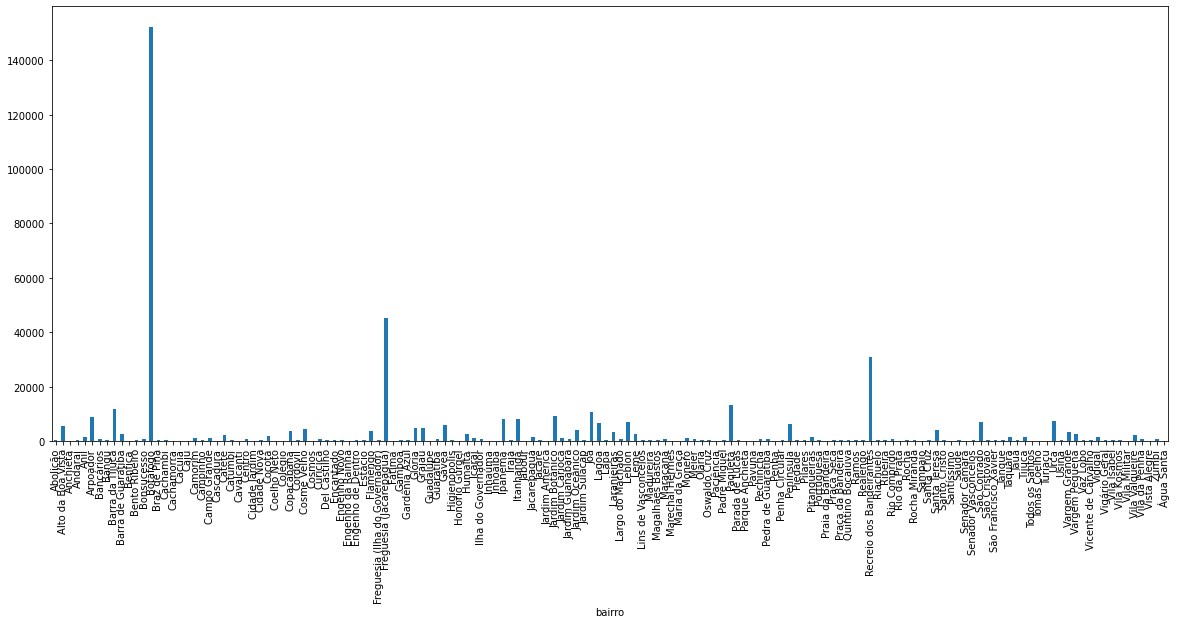

In [ ]:
# calcula o desvio padrão da variável 'valor', por bairro
df_agrupado_bairro_all.valor.std().plot.bar()

Text(0.5, 1.0, 'Valor médio do Aluguel por Bairro')

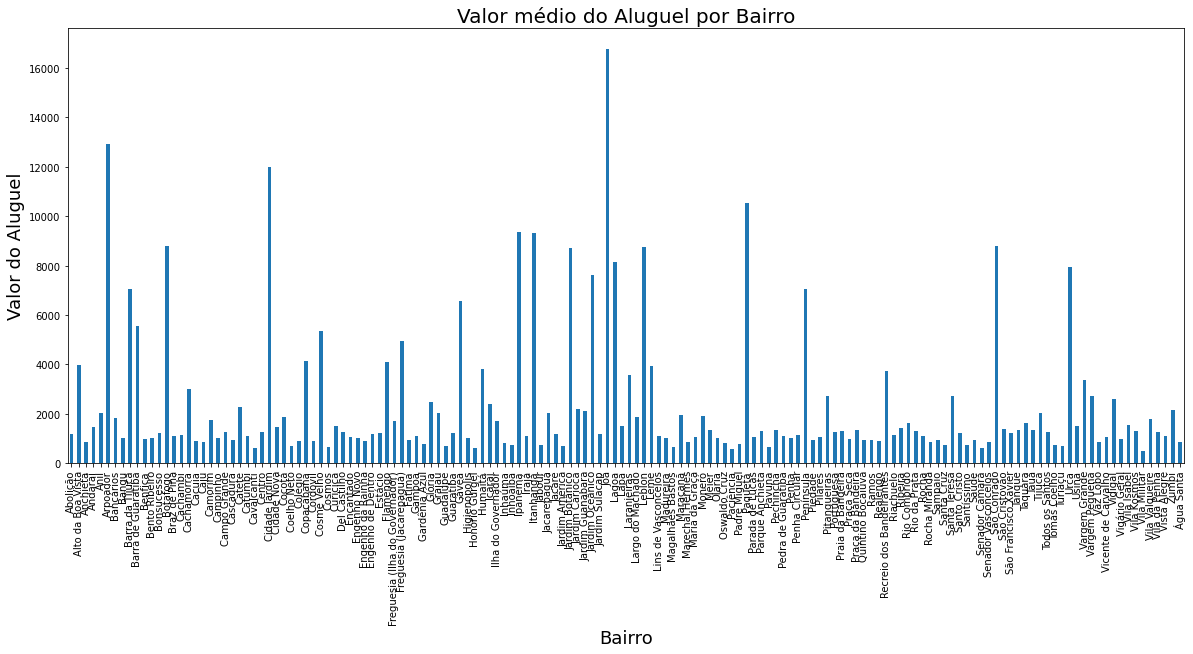

In [ ]:
# plota média da variável 'valor', por bairro
fig = df_agrupado_bairro_all.valor.mean().plot.bar()
fig.set_ylabel("Valor do Aluguel", {'fontsize': 18})
fig.set_xlabel("Bairro", {'fontsize': 18})
fig.set_title("Valor médio do Aluguel por Bairro", {'fontsize': 20})

Olhando para esses dois gráficos podemos ver que o valor máximo de aluguel para alguns bairros estão muito maiores que as médias. Isso pode indicar que estes dados são _outliers_.

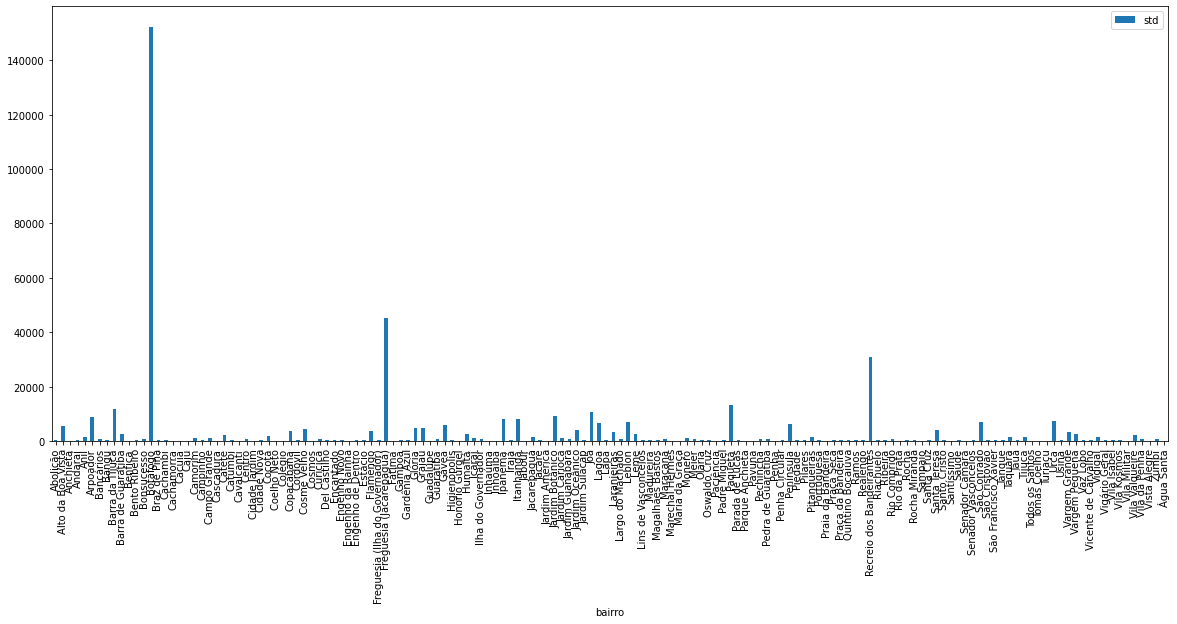

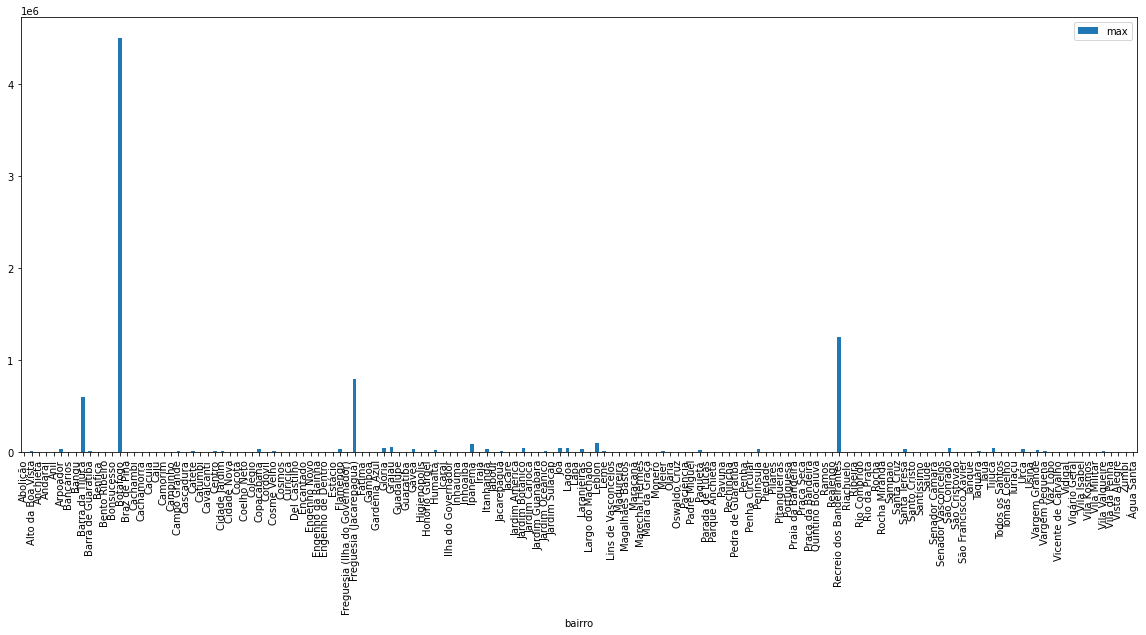

In [ ]:
# define função para plotar gráficos
def plota_stat_func(funcao):
    df_agrupado_bairro_all.valor.aggregate([funcao]).plot.bar()

for f in ['std', 'max']:
    plota_stat_func(f)

### 7.3 Criando faixas de valor com `cut()`

Vamos criar classes indicando quantos quartos um imóvel tem e classificar. Inicialmente as classes são: 

- 1 e 2 quartos
- 3 e 4 quartos
- 5 e 6 quartos
- 7 ou mais quartos

Começamos criando uma lista que deve conter o valor mínimo (zero), o valor máximo (`df.quartos.max()`) e os limites das classes entre esses dois:

In [ ]:
classes = [0, 2, 4, 6, df.quartos.max()]
classes

[0, 2, 4, 6, 14]

In [ ]:
# cria as faixas e classifica os imóveis com cut()
quartos = pd.cut(x=df.quartos, bins=classes)
quartos

0        (0.0, 2.0]
1        (0.0, 2.0]
2        (0.0, 2.0]
3        (0.0, 2.0]
4        (0.0, 2.0]
            ...    
21821    (0.0, 2.0]
21822           NaN
21823    (2.0, 4.0]
21824    (0.0, 2.0]
21825    (0.0, 2.0]
Name: quartos, Length: 21826, dtype: category
Categories (4, interval[int64, right]): [(0, 2] < (2, 4] < (4, 6] < (6, 14]]

In [ ]:
# distribuição de imóveis nas faixas
pd.value_counts(quartos)

(0, 2]     11250
(2, 4]      9681
(4, 6]       686
(6, 14]       50
Name: quartos, dtype: int64

In [ ]:
# cria as faixas com nomes personalizados
nome_faixas = ['1 e 2 quartos', '3 e 4 quartos', '5 e 6 quartos', '7 ou mais quartos']
quartos = pd.cut(x=df.quartos, bins=classes, labels=nome_faixas)
quartos

0        1 e 2 quartos
1        1 e 2 quartos
2        1 e 2 quartos
3        1 e 2 quartos
4        1 e 2 quartos
             ...      
21821    1 e 2 quartos
21822              NaN
21823    3 e 4 quartos
21824    1 e 2 quartos
21825    1 e 2 quartos
Name: quartos, Length: 21826, dtype: category
Categories (4, object): ['1 e 2 quartos' < '3 e 4 quartos' < '5 e 6 quartos' < '7 ou mais quartos']

In [ ]:
pd.value_counts(quartos)

1 e 2 quartos        11250
3 e 4 quartos         9681
5 e 6 quartos          686
7 ou mais quartos       50
Name: quartos, dtype: int64

In [ ]:
# imóveis classificados
pd.value_counts(quartos).sum()

21667

In [ ]:
# total de imóveis
len(quartos)

21826

In [ ]:
df.shape[0]

21826

Note que o número de imóveis que recebeu uma classificação é menor que o total de imóveis que temos em nosso df. Isso ocorre porque não indicamos que o valor mais baixo (zero) deve ser incluso e muito provavlemnte existem imóveis com zero quartos.

In [ ]:
df.query("quartos == 0").shape[0]

159

In [ ]:
df.query("quartos == 0").shape[0] + pd.value_counts(quartos).sum() == df.shape[0]

True

In [ ]:
# inclui imóveis com zero quartos
quartos = pd.cut(x=df.quartos, bins=classes, labels=nome_faixas, include_lowest=True)
pd.value_counts(quartos)

1 e 2 quartos        11409
3 e 4 quartos         9681
5 e 6 quartos          686
7 ou mais quartos       50
Name: quartos, dtype: int64

In [ ]:
# para incluir essa coluna no nosso df basta atribuir a series quartos à coluna que quisermos
df['quartos_classif'] = quartos
df

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor_m2,tipo_agregado,quartos_classif
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento,1 e 2 quartos
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa,1 e 2 quartos
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,1 e 2 quartos
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,1 e 2 quartos
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,1 e 2 quartos
...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento,1 e 2 quartos
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento,1 e 2 quartos
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento,3 e 4 quartos
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento,1 e 2 quartos


## 8 Removendo _outliers_

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(16, 7))

df = pd.read_csv('dados/aula1_aluguel_residencial.csv', sep=';')
df.columns = df.columns.str.lower()

### 8.1 Identificando e removendo _outliers_

Vamos fazer a identificação dos _outliers_ através do gráfico de [box-plot](https://www.simplypsychology.org/boxplots.html), que apresenta os intervalos em que os dados estão distribuídos.

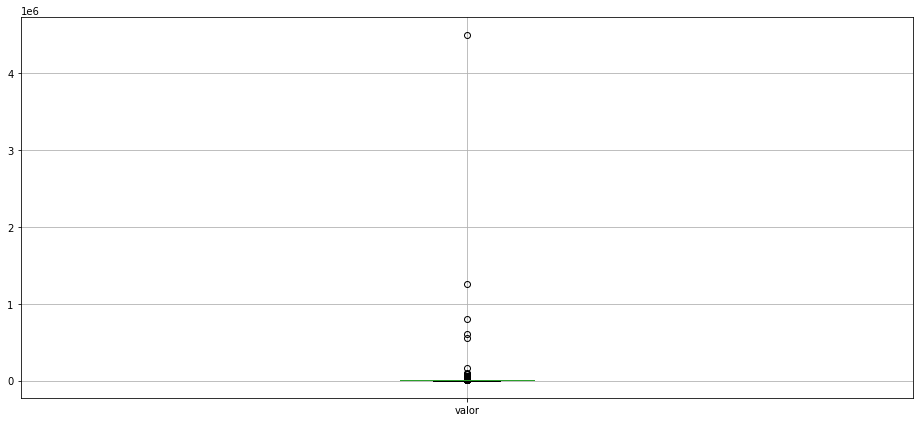

In [ ]:
df.boxplot(column=['valor'])

Comparando o box-plot da variável 'valor' com a representação acima, podemos observar que temos alguns tão discrepantes que mal conseguimos visualizar o gráfico.

Vamos selecionar esses valores muito discrepantes em nosso df, com aluguel superior a R\$ 500.000,00:

In [ ]:
df.query("valor >= 500000")

,tipo,bairro,quartos,vagas,suites,area,valor,condominio,iptu,valor_m2,tipo_agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


Note que esses imóveis muito provavelmente foram cadastrados de forma incorreta, pois o valor é incoerente com todas as outras variáveis.

Agora vamos calcular o valor de cada um dos quartis e tentar relacioná-los com o gráfico.

In [ ]:
# valor do primeiro quartil, ou seja, 25% dos dados possuem um valor entre o limite inferior e q1
q1 = df.valor.quantile(0.25)
q1

1600.0

In [ ]:
# mediana
q2 = df.valor.quantile(0.5)
q2

2700.0

In [ ]:
# terceiro quartil, 75% dos valores estão abaixo de q3
q3 = df.valor.quantile(0.75)
q3

5500.0

In [ ]:
# 
iqr = q3 - q1
iqr

3900.0

In [ ]:
lim_inf = q1 - (iqr * 1.5)
lim_inf

-4250.0

In [ ]:
lim_sup = q3 + (iqr * 1.5)
lim_sup

11350.0

Conhecendo o valor do limite superior podemos plotar novamente o gráfico, mas dessa vez limitando o _range_ do eixo vertical, excluindo vários _outliers_ de modo que consigamos visualizar todo o box e comparar a posição (valor) dos quartis que calculamos.

(0.0, 12000.0)

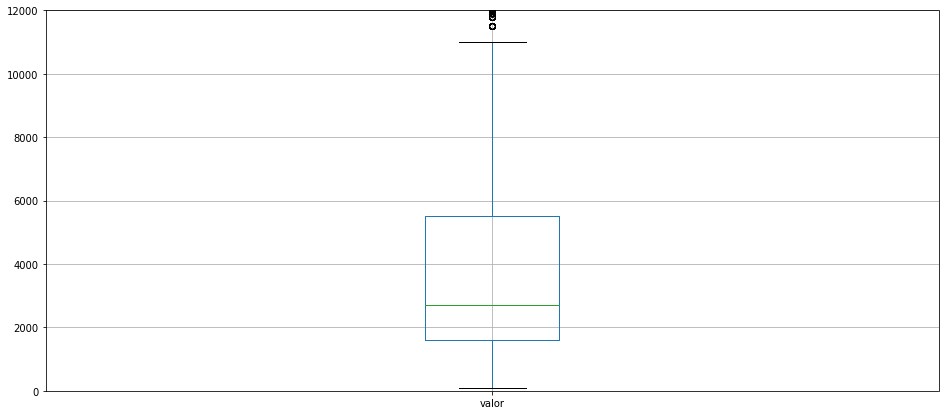

In [ ]:
ax = df.boxplot(column=['valor'])
ax.set_ylim([0, 12000])

Se queremos realmente remover os _outliers_ do nosso conjunto de dados basta selecionar os dados dentro dos limites inferior e superior. 

Plotando novamente o box-plot, mas agora usando o df selecionado sem _outliers_, vemos que os valores dos quartis são diferentes dos anteriores e ainda temos _outliers_. Isso ocorre pois agora temos um novo conjunto de dados, e portanto, novos _outliers_.

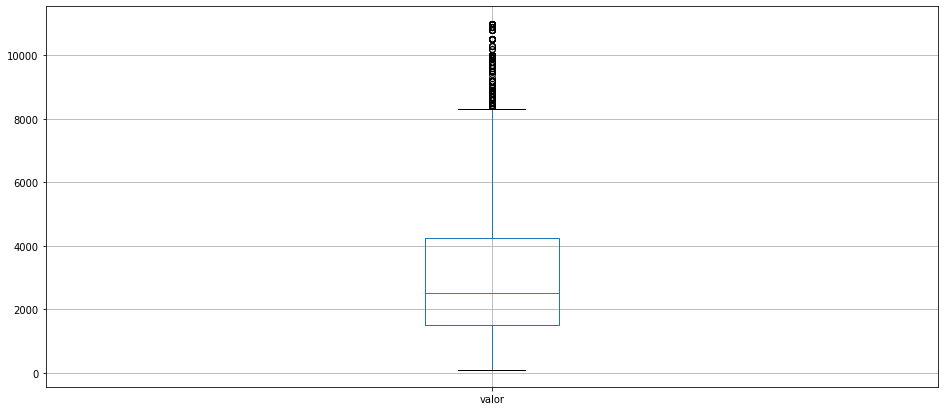

In [ ]:
ax = df.query(f"valor >= {lim_inf} and valor <= {lim_sup}").boxplot(column=['valor'])

In [ ]:
# variavel valor_m2
q1 = df.valor_m2.quantile(0.25)
q2 = df.valor_m2.quantile(0.5)
q3 = df.valor_m2.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - (iqr * 1.5)
lim_sup = q3 + (iqr * 1.5)

In [ ]:
print(f"q1: {q1}\nq2: {q2}\nq3: {q3}\niqr: {iqr}\nlim_inf: {lim_inf}\nlim_sup: {lim_sup}")

q1: 21.12
q2: 29.97
q3: 42.0
iqr: 20.88
lim_inf: -10.2
lim_sup: 73.32


(0.0, 80.0)

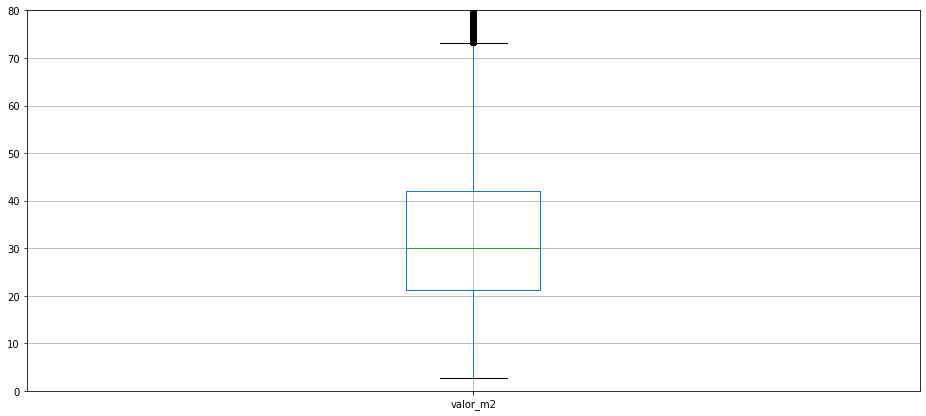

In [ ]:
ax = df.boxplot(column=['valor_m2'])
ax.set_ylim([0, 80]) # se nao limitar o range fica impossivel de enxergar o box

### 8.2 Identificando e removendo _outliers_ por grupos

Essa é uma abordagem interessante pois com ela podemos identificar comportamentos considerados discrepantes para um grupo, mas para outro. Além disso cada grupo pode ter uma dinâmica diferente.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


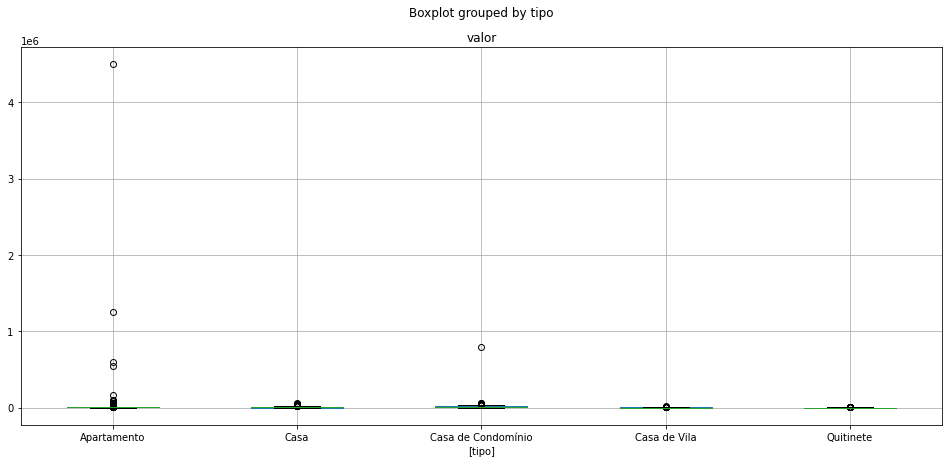

In [ ]:
ax = df.boxplot(column=['valor'], by=['tipo'])

In [ ]:
# criamos um df de grupamento, mas apenas com a variavel valor
df_agrupado_tipo = df.groupby('tipo').valor

In [ ]:
type(df_agrupado_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [ ]:
# calculamos os quartis e limites, mas agora como series
q1 = df_agrupado_tipo.quantile(0.25)
q2 = df_agrupado_tipo.quantile(0.5)
q3 = df_agrupado_tipo.quantile(0.75)
iqr = q3 - q1
lim_inf = q1 - (iqr * 1.5)
lim_sup = q3 + (iqr * 1.5)

In [ ]:
q1

tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: valor, dtype: float64

In [ ]:
q3['Casa de Condomínio']

15250.0

In [ ]:
# novo dataframe que sera usado para plotar os novos box-plots
df_tipos = pd.DataFrame()

# elimina os outliers de cada tipo e vai empilhando os dados no novo dataframe
for tipo in df_agrupado_tipo.groups.keys():
    df_tipo = df.query(f"tipo == '{tipo}' and valor >= {lim_inf[tipo]} and valor <= {lim_sup[tipo]}")
    df_tipos = pd.concat([df_tipos, df_tipo])

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


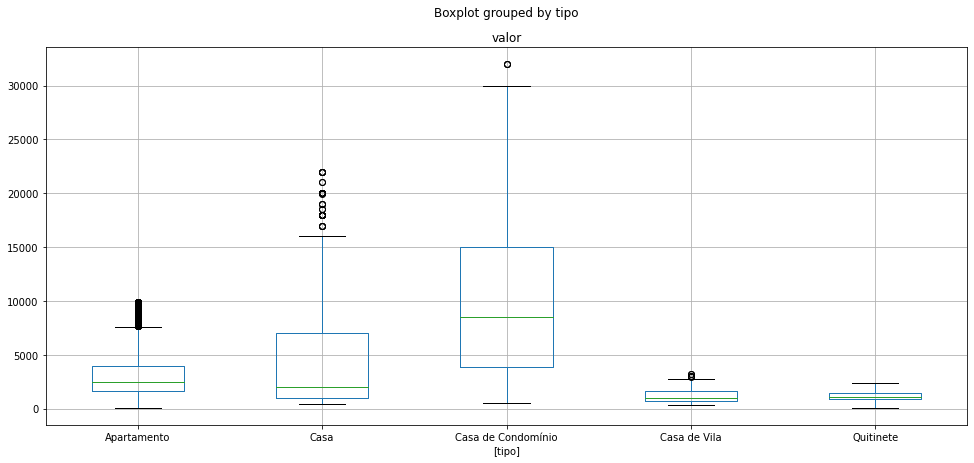

In [ ]:
df_tipos.boxplot(column=['valor'], by=['tipo'])

Comparando esses plots (por tipo de imóvel) com o que foi feito antes (para todo conjunto), fica bem evidente que cada tipo de imóvel possui um comportamento próprio. Por exemplo, antes calculamos o limite superior em R\$ 11.350,00 e agora calculamos o `q3` para 'Casa de Condomínio' em R\$ 15.250,00, o que significa que antes estávamos removendo dados relevantes do nosso conjunto.

In [ ]:
df.to_csv('dados/aula1_aluguel_residencial_no_outliers.csv', sep=';', index=False)

### 8.3 Mais sobre gráficos

Vamos explorar um pouco mais dos recursos do `matplotlib` plotando quatro gráficos em uma mesma figura e depois salvando esse gráfico.

In [ ]:
# seleciono apenas imóveis com valor inferior a 15000 (porque sei que os gráficos ficam mais "bonitos" assim)
df = df.query("valor < 15000")
plt.rc('figure', figsize=(16, 7))

In [ ]:
# cria area em que vamos colocar os quatro gráficos
area = plt.figure()

<Figure size 1152x504 with 0 Axes>

In [ ]:
# informa que a area vai ter 4 graficos (2 linhas e 2 colunas)
g1 = area.add_subplot(2, 2, 1) # este fica na posicao 1: primeira linha, primeira coluna
g2 = area.add_subplot(2, 2, 2) # este fica na posicao 2: primeira linha, segunda coluna
g3 = area.add_subplot(2, 2, 3) # este fica na posicao 3: segunda linha,  primeira coluna
g4 = area.add_subplot(2, 2, 4) # este fica na posicao 4: segunda linha,  segunda coluna

In [ ]:
# define o plot em cada gráfico
g1.scatter(x=df.valor, y=df.area)
g1.set_title("Dispersão de Área x Valor")

g2.hist(df.valor, bins=10) 
g2.set_title("Histograma de Valor")

dados_g3 = df.valor.sample(100).reset_index(drop=True) 
g3.plot(dados_g3)
g3.set_title("Amostra de Valor")

grupo = df.groupby('tipo').valor
g4.bar(x=grupo.mean().index, height=grupo.mean().values)
g4.set_title("Valor médio por Tipo")

Text(0.5, 1.0, 'Valor médio por Tipo')

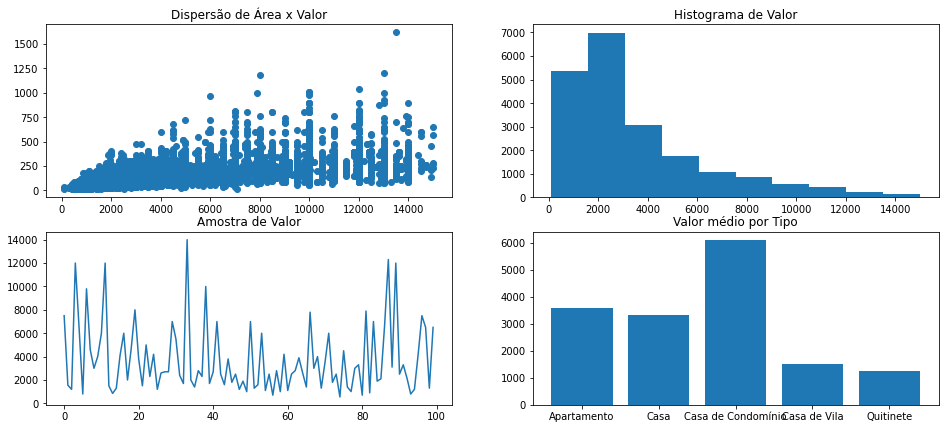

In [ ]:
# apresentamos o gráfico na saida
area

In [ ]:
# exportando gráfico para arquivo de imagem
area.savefig('imagens/aula1_aluguel_residencial.png', dpi=300, bbox_inches='tight')

#### 8.3.1 Códigos auxiliares

In [ ]:
# define inicio e fim do intervalo e o número de faixas
valor_inicial, valor_final, bins = 0, 15000, 10

# define limite das faixas
faixas_valor = list(range(valor_inicial, valor_final+1, int(valor_final/bins)))

# define rótulos das faixas
nome_barras = [f"De {faixas_valor[i-1]} a {faixas_valor[i]} reais" for i in range(1, len(faixas_valor))]

# separa os valores em faixas
barras_hist = pd.cut(x=df.valor, bins=faixas_valor, labels=nome_barras)

s_valores = pd.value_counts(barras_hist)
pd.DataFrame({'faixa_valor': s_valores.index, 'qtd': s_valores.values}).sort_values(by='faixa_valor', ignore_index=True)

,faixa_valor,qtd
0,De 0 a 1500 reais,5306
1,De 1500 a 3000 reais,7053
2,De 3000 a 4500 reais,3073
3,De 4500 a 6000 reais,1771
4,De 6000 a 7500 reais,1066
5,De 7500 a 9000 reais,850
6,De 9000 a 10500 reais,573
7,De 10500 a 12000 reais,431
8,De 12000 a 13500 reais,220
9,De 13500 a 15000 reais,117


In [ ]:
# amostra aleatória (de tamanho 100) dentro df
df.valor.sample(100)

16142    4900.0
19809    8000.0
16307    8500.0
10583    8500.0
14681     850.0
          ...  
9943     2990.0
12910    3391.0
12900    1800.0
8696     2300.0
5647      500.0
Name: valor, Length: 100, dtype: float64

In [ ]:
# média de valor por tipo
grupo.mean().round(2)

tipo
Apartamento           3593.88
Casa                  3311.38
Casa de Condomínio    6099.28
Casa de Vila          1520.23
Quitinete             1246.84
Name: valor, dtype: float64